In [1]:
%matplotlib inline

# **Знакомство с библиотекой Pandas**  

Данный пакет делает Python мощным инструментом для анализа данных. Пакет дает возможность строить сводные таблицы, выполнять группировки, предоставляет удобный доступ к табличным данным, а при наличии пакета matplotlib дает возможность рисовать графики на полученных наборах данных. Далее будут показаны основы работы с пакетом, такие как загрузка данных, обращение к полям, фильтрация и построение сводных.

## Основные структуры данных и их загрузка

Основными контейнерами `pandas` являются Series и DataFrame.
Series – это проиндексированный одномерный массив значений. Он похож на простой словарь типа dict, где имя элемента будет соответствовать индексу, а значение – значению записи.
DataFrame — это проиндексированный многомерный массив значений, соответственно каждый столбец DataFrame, является структурой Series.
Итак, со структурами чуток разобрались. Перейдем непосредственно к работе с пакетом. Для начала анализа каких-либо данных их надо загрузить. Pandas предоставляет широкий выбор источников данных, например:

* SQL
* Текстовые файлы
* Excel файлы
* HTML

Данная лабораторная работа разделена на следующие части:

**Создание данных** - Начнем с создания небольшой базы данных. Это будет небольшой csv-файл.

**Получение данных** - Прочитаем созданный текстовый файл. Данные будут состоять из детских имен и количества детей с такими именами, родившимися в 1880 году (данные взяты из американской статистики).

**Обработка данных** - Здесь мы проверим целостность данных и убедимся, что они "чистые" - т.е. не содержат в себе ошибок, нестыковок и так далее.

**Анализ данных** - Просто определим наиболее популярное имя в 1880 году.

**Визуализация данных** - Покажем результаты анализа на графике.
    

Библиотека ***pandas*** используется в качестве инструмента для анализа данных. ***matplotlib*** используется для визуализации результатов анализа. Подключим необходимые библиотеки:

In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import os
import pandas as pd # для определения версии pandas

Проверим - установлена ли **pandas** на рабочую машину:

In [2]:
print('Pandas version ' + pd.__version__)

Pandas version 1.2.4


# Создание данных

Набор данных состоит из 5 имен и количества детей с данными именами:

In [3]:
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]


Для совмещения двух списков используем функцию ***zip***:

In [4]:
a = [1,2,3]
b = ['a','b', 'c']
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [6]:
'''
zip(seq1 [, seq2 [...]]) -> [(seq1[0], seq2[0] ...), (...)]
Return a list of tuples, where each tuple contains the i-th element
from each of the argument sequences.  The returned list is truncated
in length to the length of the shortest argument sequence.
'''

zip?

Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(*iterables) --> A zip object yielding tuples until an input is exhausted.

   >>> list(zip('abcdefg', range(3), range(4)))
   [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

The zip object yields n-length tuples, where n is the number of iterables
passed as positional arguments to zip().  The i-th element in every tuple
comes from the i-th iterable argument to zip().  This continues until the
shortest argument is exhausted.
Type:           type
Subclasses:     


In [7]:
BabyDataSet = list(zip(names,births))
print(list(BabyDataSet))

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]


Мы создали первичный набор данных. Теперь используем ***pandas*** чтобы экспортировать эти данные в csv файл. 

***df*** обозначает объект ***DataFrame***. Его можно представить как объект, который содержит в себе sql- или excel-подобную таблицу. Определим содержимое ***df***. Обратите внимание, как задается массив данных и как задаются заголовки данных:

In [8]:
df = DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Экспортируем данные в ***csv*** файл ***births1880.csv***. Для этого воспользуемся функцией ***to_csv***. Файл будет сохранен в той же директории, откуда была запущена оболочка, если путь не будет задан как абсолютный. Ознакомимся с краткой справкой по ***df.to_csv***:

In [9]:
'''
df.to_csv(self, path_or_buf, sep=',', na_rep='', float_format=None, cols=None, header=True, index=True, index_label=None, mode='w', nanRep=None, encoding=None, quoting=None, line_terminator='\n')
Write DataFrame to a comma-separated values (csv) file
'''

df.to_csv?

Signature:
df.to_csv(
    path_or_buf: 'Optional[FilePathOrBuffer]' = None,
    sep: 'str' = ',',
    na_rep: 'str' = '',
    float_format: 'Optional[str]' = None,
    columns: 'Optional[Sequence[Label]]' = None,
    header: 'Union[bool_t, List[str]]' = True,
    index: 'bool_t' = True,
    index_label: 'Optional[IndexLabel]' = None,
    mode: 'str' = 'w',
    encoding: 'Optional[str]' = None,
    compression: 'CompressionOptions' = 'infer',
    quoting: 'Optional[int]' = None,
    quotechar: 'str' = '"',
    line_terminator: 'Optional[str]' = None,
    chunksize: 'Optional[int]' = None,
    date_format: 'Optional[str]' = None,
    doublequote: 'bool_t' = True,
    escapechar: 'Optional[str]' = None,
    decimal: 'str' = '.',
    errors: 'str' = 'strict',
    storage_options: 'StorageOptions' = None,
) -> 'Optional[str]'
Docstring:
Write object to a comma-separated values (csv) file.

.. versionchanged:: 0.24.0
    The order of arguments for Series was changed.

Parameters
----------
p

Мы используем только параметры ***index*** (содержимое) и ***header*** (заголовок). Если они установлены как True это не позволит экспортировать содержимое и заголовок имен. Изменим эти величины при экспорте:

In [10]:
df.to_csv('births1880.csv',index=False,header=False)

## Получение данных

Для обратной операции (чтение данных из файла) используем функцию *read_csv*. Ознакомимся с документацией для этой функции:

In [25]:
read_csv?

Signature:
read_csv(
    filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap],
    sep=<object object at 0x7fe92bf830b0>,
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
 

Функция позволяет использовать множество различных параметров, но мы используем только указание на файл который нужно прочитать:

`Location = C:\Users\ENTER_USER_NAME\.xy\startups\births1880.csv`

***Примечание:*** В зависимости от того, откуда был запущен интерпретатор - местоположение файла может меняться.

In [12]:
Location = r'births1880.csv'
df = read_csv(Location)

Узнать местоположение интерпретатора можно через `os.getcwd()`

In [13]:
import os
os.getcwd()

'/home/vik/jupyter/pandas_datamining_logs'

Обратите внимание на префикс ***r*** перед строкой.

In [14]:
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


Обратите внимание, что поскольку мы использовали импорт ***read_csv*** без заголовка - то функция использовала первую запись в файле как заголовок.

Чтобы исправить это используем параметр ***header***, установив его в ***None***:

In [15]:
df = read_csv(Location, header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Если нам потребуется задать определенные заголовки колонок - это можно сделать с помощью параметра ***names***, при этом указывать *header* не обязательно:

In [16]:
df = read_csv(Location, names=['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Номера строк [0,1,2,3,4] входят в состав структуры ***index*** объекта pandas.

Удалим csv файл, чтобы не оставлять его после использования:

In [17]:
os.remove(Location)

## Обработка данных

Проверим соответствие данных их типам:

In [18]:
print(df.dtypes)

Names     object
Births     int64
dtype: object


In [19]:
df.Births.dtype

dtype('int64')

## Анализ данных

Для нахождения наиболее популярного имени можно использовать два способа:

* Отсортировать данные в таблице по размеру и выбрать верхнюю строку
* Использовать метод ***max()***

In [20]:
# Способ 1:
Sorted = df.sort_values(['Births'], ascending=[0])
Sorted.head(1)

,Names,Births
4,Mel,973


In [21]:
df.sort_values(['Names'], ascending=[0])

,Names,Births
4,Mel,973
2,Mary,77
3,John,578
1,Jessica,155
0,Bob,968


In [22]:
# Способ 2:
df['Births'].max()

973

## Визуализация данных

Визуализируем график колонки ***Births*** и пометим максимальную точку на графике:

In [23]:
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Text(1.5, 800, 'Это Мел')

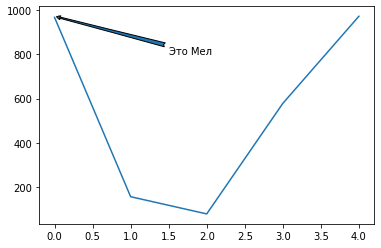

In [24]:
# Создаем график
df['Births'].plot()

# Находим максимальную величину
MaxValue = df['Births'].max()

# Находим имя для максимального числа
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Задаем текст для отметки на графе
Text = str(MaxValue) + " - " + MaxName

# Добавляем текст к графу
plt.annotate('Это Мел', xy=(0, MaxValue), xytext=(1.5, 800), 
             arrowprops=dict(arrowstyle="fancy",
                            connectionstyle="arc3"))




## Задание

Задайте переменную `spisok`, в которую занесите любые семь элементов из следующего набора данных (выбирается согласно варианту):

1. Список дней недели.
2. Список из семи любых фамилий студентов, присутствующих в аудитории.
3. Список из семи любых названий месяцев.
4. Список из семи любых имен студентов, присутствующих в аудитории.
5. Список из семи любых названий предметов в расписании.
6. Список из семи любых предметов в вашем рюкзаке.
7. Название любых семи улиц города.
8. Название любых семи городов.
9. Название любых семи марок автомобилей.
10. Название любых семи деталей компьютера.
11. Название любых семи фильмов.
12. Название любых семи стран.

Задайте переменную `quantity`, в которую занесите любые семь элементов из следующего набора данных (выбирается согласно варианту). В тех случаях, когда затруднительно получить точную величину - задавайте ее произвольно.

1. Количество дней недели в текущем месяце (например для марта-2014 - 5 воскресений, 5 понедельников, 4 вторника и так далее).
2. Вес каждого из студентов.
3. Количество дней в соответствующих месяцах.
4. Количество посещенных студентами занятий.
5. Количество занятий в семестре для каждого из предметов.
6. Вес каждого из предметов в рюкзаке в граммах.
7. Количество домов на каждой из семи улиц города.
8. Количество жителей в каждом из семи городов.
9. Средняя цена каждой из семи марок автомобилей.
10. Средняя цена деталей компьютера.
11. Рейтинг каждого из семи фильмов по версии IMDB.
12. Площадь каждой из семи стран.

Для переменных `spisok` и `quantity` задайте заголовки, сохраните их в csv-файл, прочитайте из csv-файла, найдите максимальную величину и визуализируйте результат по образцу лабораторной работы.